In [5]:
% load_ext autoreload
% autoreload 2
% matplotlib inline

import warnings

warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import segyio
from prox4d.timeshift import *
from prox4d.utils_ import *
import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Sleipner data

In [3]:
# Seismic data loading

f94 = segyio.open('../data/Sleipner/94p07ful.sgy')
d94 = segyio.cube(f94)
b = d94.transpose(2, 1, 0)[:680]  # Baseline section
f01 = segyio.open('../data/Sleipner/01p07ful.sgy')
d01 = segyio.cube(f01)
m = d01.transpose(2, 1, 0)[:680]  # Monitor section
dt = 0.002
nt, nx, ny = b.shape
t = np.arange(nt) * dt

b2d = b[:, :, 120]
m2d = m[:, :, 120]

## Convention

Data equation: $ b(t) = m(t+\delta t)$

If $\delta t > 0$, the monitor is delayed with respect to the baseline, it means there is a velocity slowdown ($\delta v < 0$).

If $\delta t < 0$, the monitor is anticipated with respect to the baseline, it means there is a velocity speedup ($\delta v >0$).


## Time-shift inversion (2D)

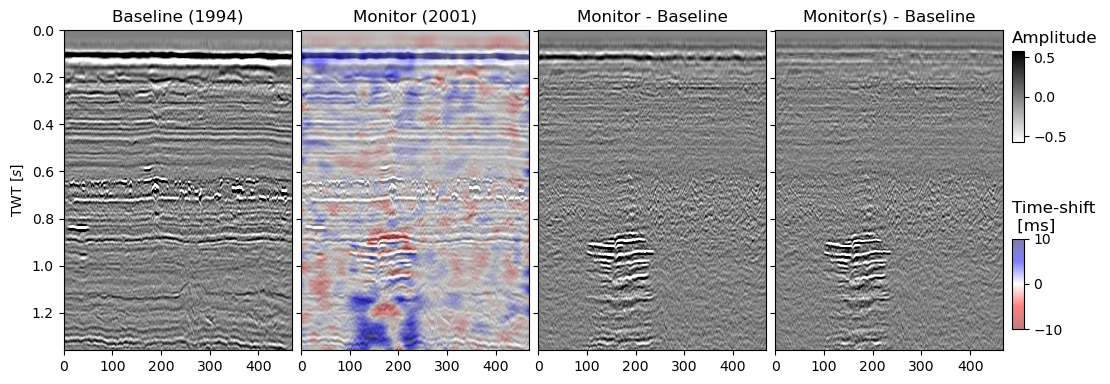

In [7]:
shift_est, mshift = linearized_timeshift(b2d, m2d, dt, epsRs=1e3, outeriter=3, inneriter=1000)

plotter_timeshift(b2d, m2d, shift_est.T, mshift, dt=dt, perc=2, height=4, width=12, dif_scale=1., alpha=0.5)

## Time-shift inversion (3D)

7880.959935665131


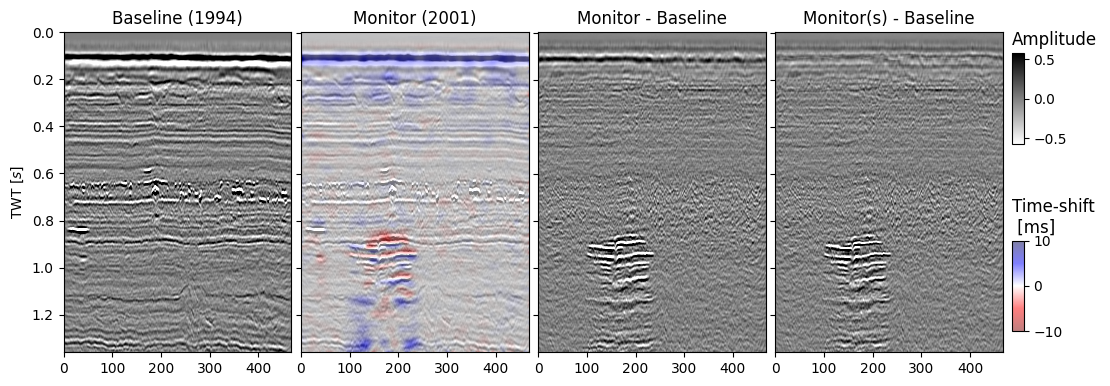

In [5]:
shift, mshift = linearized_timeshift(b, m, dt, epsRs=1e3, outeriter=3, inneriter=200)
end = time.time()
i = 120
plotter_timeshift(b[:, :, i], m[:, :, i], shift[i, :].T, mshift[:, :, i], dt=dt, perc=2, height=4, width=12,
                  dif_scale=1., alpha=0.5)

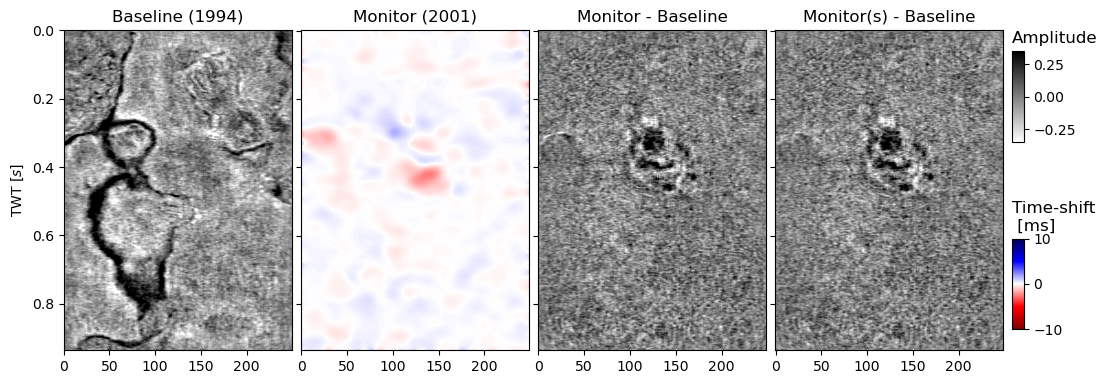

In [50]:
# Top view
ts = 550
plotter_timeshift(b[ts], m[ts], shift[:, :, ts].T, mshift[ts], dt=dt, perc=2, height=4, width=12, dif_scale=1.,
                  alpha=1.)